## Results plotter

Plot results in an unified way, using results from csv files generated by 

File: compute_added_mass.ipynb

In [1]:
import numpy as np
import math as mat
import cmath as cmat
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import csv


# MatPlotLib set LaTeX font
plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Tahoma']

In [2]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

In [3]:
def read_results(fn):
    
    data = []
    with open(fn, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            L = row['L']
            B = row['B']
            T = row['T']
            Cb = row['Cb']
            dsp = row['Disp']
            ukc = row['UKC']
            am = row['am']
            
            data.append([L,B,T,Cb,dsp,ukc,am])
            
    return np.array(data, dtype=float)

def read_circ_results(fn):
    
    data = []
    with open(fn, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            x = row['x']
            y = row['y']
            
            data.append([x,y])
            
    return np.array(data, dtype=float)

In [4]:
def get_plot_data(data):
    
    B = data[0,1]
    T = data[:,2]
    
    BT = B*np.divide(1,T)
    dsp = data[:,4]/1000*1.025
    ukc = data[:,5]
    am = data[:,6]/1000*1.025
    
    am_dsp = np.divide(am,dsp) * 100
    ukc_t = np.divide(ukc,T) * 100
    
    return [am,BT,ukc,am_dsp,ukc_t]

In [5]:
def plot_results_01(data,title,pdf_name):
    
    L = data[0,0]
    B = data[0,1]
    T = data[:,2]
    Cb = data[0,3]
    dsp = data[:,4]/1000*1.025
    ukc = data[:,5]
    am = data[:,6]/1000*1.025
    BT = B * np.divide(1,T)
    
    pam = np.divide(am,dsp)*100
    
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()
    
    par2.spines["right"].set_position(("axes", 1.2))
    make_patch_spines_invisible(par2)
    par2.spines["right"].set_visible(True)

    p1, = host.plot(am, BT, "g-", label=r'$B/T$')
    p2, = par1.plot(am, ukc, "b-", label=r'UKC')
    p3, = par2.plot(am, pam, "r-", label=r'$m_{22}/D$')
    
    #host.set_xlim(0, 2)
    #host.set_ylim(0, 2)
    #par1.set_ylim(0, 4)
    #par2.set_ylim(1, 65)

    host.set_xlabel(r"Added mass - $m_{22}$ [10$^3$t] ")
    host.set_ylabel(r"$B/T$")
    par1.set_ylabel(r"UKC [m]")
    par2.set_ylabel(r"$m_{22}$/Disp [\%]")
    
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    host.grid(True)
    plt.title(title)
    
    fig.savefig(pdf_name)

In [6]:
def plot_results_02(MR,LR1,LR2,circ,xlabel,ylabel,pdf_name):
    
    fig, ax = plt.subplots()
    ax.plot(MR[0], MR[1], "g-", label=r"MR")
    ax.plot(LR1[0], LR1[1], "b-", label=r"LR1")
    ax.plot(LR2[0], LR2[1], "r-", label=r"LR2")
    
    if len(circ) > 0:
        ax.plot(circ[:,0], circ[:,1], "k-.", label=r"Circle")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)
    
    fig.savefig(pdf_name)

In [7]:
data_MR = read_results('results_MR.csv')
data_LR1 = read_results('results_LR1.csv')
data_LR2 = read_results('results_LR2.csv')

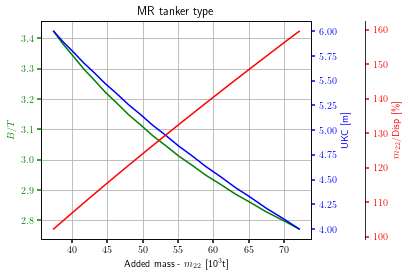

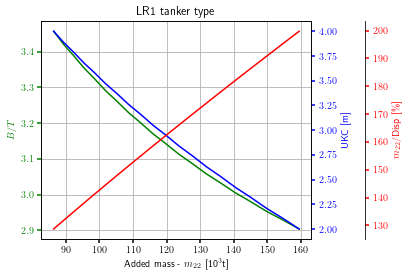

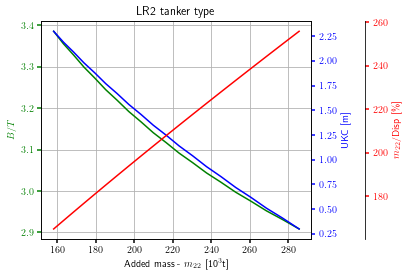

In [8]:
plot_results_01(data_MR,'MR tanker type','result_MR.pdf')
plot_results_01(data_LR1,'LR1 tanker type','result_LR1.pdf')
plot_results_01(data_LR2,'LR2 tanker type','result_LR2.pdf')

In [9]:
pd_MR = get_plot_data(data_MR)
pd_LR1 = get_plot_data(data_LR1)
pd_LR2 = get_plot_data(data_LR2)
pd_C = read_circ_results('results_circ.csv')

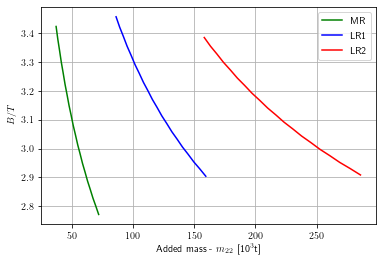

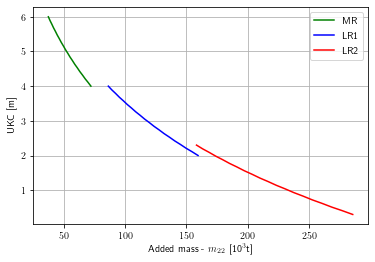

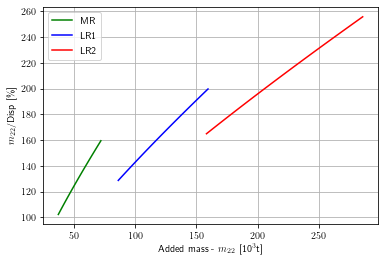

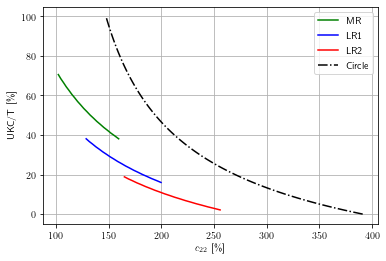

In [10]:
xl = r"Added mass - $m_{22}$ [10$^3$t]"
plot_results_02([pd_MR[0],pd_MR[1]],[pd_LR1[0],pd_LR1[1]],[pd_LR2[0],pd_LR2[1]], [], xl, r"$B/T$", "result_BT.pdf")
plot_results_02([pd_MR[0],pd_MR[2]],[pd_LR1[0],pd_LR1[2]],[pd_LR2[0],pd_LR2[2]], [], xl, r"UKC [m]", "result_UKC.pdf")
plot_results_02([pd_MR[0],pd_MR[3]],[pd_LR1[0],pd_LR1[3]],[pd_LR2[0],pd_LR2[3]], [], xl, r"$m_{22}$/Disp [\%]", "result_DM.pdf")
plot_results_02([pd_MR[3],pd_MR[4]],[pd_LR1[3],pd_LR1[4]],[pd_LR2[3],pd_LR2[4]], pd_C, r"$c_{22}$ [\%]", r"UKC/T [\%]", "result_c22_UKC_T.pdf")